In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
import os
project_path = os.getcwd() # Ubicación del proyecto

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Bootcamp-DS/Modulo 2/proyecto/Super_Store_data.csv'
df = pd.read_csv(file_path, index_col=[0], parse_dates=['Ship Date', 'Order Date'])
print(df.shape)
df.head()

(2121, 21)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Coordinates
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-12,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,1.0000,2,0.00,41.9136,"(37.8393, -84.27)"
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1.0000,1,0.00,219.5820,"(37.8393, -84.27)"
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,"(27.9944, -81.7603)"
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,1,0.00,14.1694,"(36.7783, -119.4179)"
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,"(36.7783, -119.4179)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 1 to 9991
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       2121 non-null   object        
 1   Order Date     2121 non-null   datetime64[ns]
 2   Ship Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Product Name   2121 n

# EDA

<Axes: >

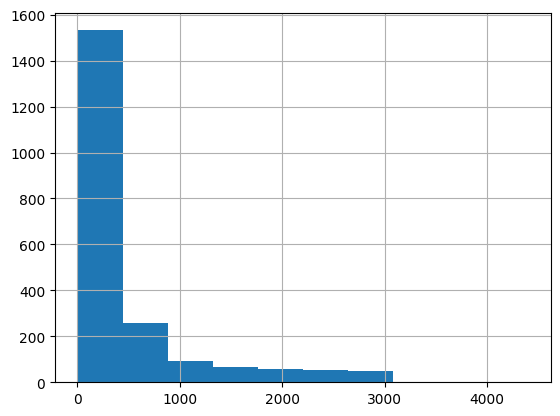

In [ ]:
df.Sales.hist()

In [ ]:
df['Order Date', 'Ship Date', 'Sales', 'State', 'City', 'Segment', 'Ship Mode', 'Profit', 'Custumer ID']

In [ ]:
# ¿cuantas veces se repite en el dataset su respectivo valor de 'Order ID'?

order_repetitions = df.groupby('Order ID')['Order ID'].transform('count')
order_repetitions.unique()
# Como máximo incluyen 4 artículos diferentes en el carrito

array([2, 1, 3, 4])

<Axes: >

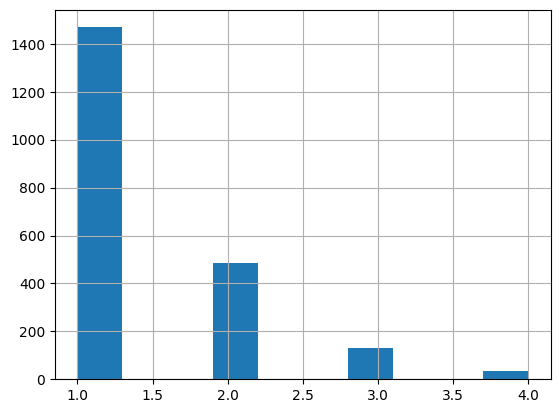

In [ ]:
# La mayoría de compras se hacen con solo 1 producto
order_repetitions.hist()

In [ ]:
productName_per_id = df.groupby('Product Name')['Product ID'].nunique()
productName_per_id[productName_per_id > 1]
# Hay productos asociados a IDs diferentes

Product Name
Eldon Wave Desk Accessories      2
Eldon Wave Desk Accessories--    2
KI Adjustable-Height Table       2
Staple-based wall hangings       2
Name: Product ID, dtype: int64

In [ ]:
# Cantidad de productos en venta
print(f"Cantidad total de productos: {df['Product Name'].unique().shape[0]}\n\nCantidad por Subcategoría:")
df.groupby('Sub-Category')['Product Name'].nunique()

Cantidad total de productos: 541

Cantidad por Subcategoría:


Sub-Category
Bookcases       73
Chairs         127
Furnishings    259
Tables          82
Name: Product Name, dtype: int64

<Axes: xlabel='Order Date'>

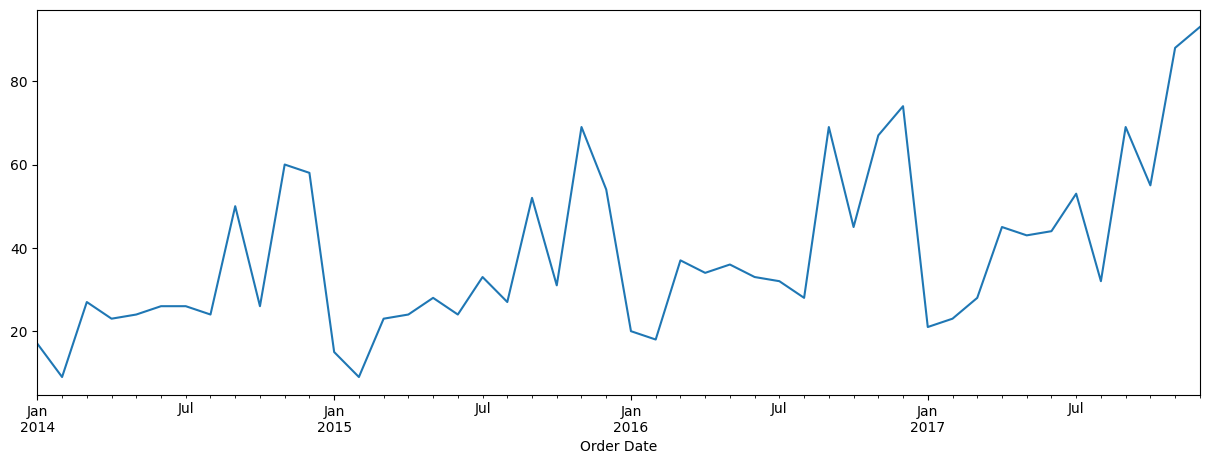

In [ ]:
# Tendencia general de la cantidad de compras que hacen los usuarios

df.groupby('Order Date')['Order ID'].nunique().groupby(pd.Grouper(freq='M')).sum().plot(figsize=(15, 5))
# Notamos que es una tendencia creciente y multiplicativa
# Diciembre siempre es nuestro pico respecto al resto de meses
# El 2do pico más grande corresponde a Septiembre
# A inicios del año hay un bajón en las ventas

# Variables de interés

1. ¿Cuál es la distribución de las ventas ('Sales') en el dataset?
    - Sales
2. Análisis de tendencias por Estado y por Tipo de Cliente
    - State, sales, State, City, Segment
3. ¿Vale la pena incluir un descuento para personas que contratan First Class?

    Operación: Tendencia por clase, tendencia de ‘Custumer ID’ unique por mes
    - Ship Mode, Profit, Custumer ID, ...

    es viable?...

    Cómo ha evolucionado el uso de 1st class en el tiempo respecto a las alternativas? (profit y número de compras por ...)

    Hay una diferencia significativa de ganancia entre los Ship Mode? (BoxPlot)

    El profit actual es suficiente incluso luego del descuento?

    cuánto como máximo podemos permitirnos de descuento?

    cuántos posibles compradores podríamos transferir a first class?

    cuántos de first class se cambian a una inferior??

    ¿Cuántos necesitaríamos para que la campaña tenga ganancias (durante su ejecución) ?

    Tenemos clientes fidelizados??


# Data for preprocesing

In [31]:
necessary_features = ['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Coordinates', 'State', 'City', 'Segment', 'Ship Mode', 'Sub-Category', 'Product Name', 'Discount', 'Sales', 'Quantity', 'Profit']
df2 = df.loc[:, necessary_features]
df2.loc[:, 'Product Name'] = df2['Product Name'].str.replace('--', '')

print(df2.shape)
df2.head()

(2121, 15)


,Order ID,Customer ID,Order Date,Ship Date,Coordinates,State,City,Segment,Ship Mode,Sub-Category,Product Name,Discount,Sales,Quantity,Profit
Row ID,,,,,,,,,,,,,,,
1,CA-2016-152156,CG-12520,2016-11-12,2016-11-11,"(37.8393, -84.27)",Kentucky,Henderson,Consumer,Second Class,Bookcases,Bush Somerset Collection Bookcase,0.00,1.0000,2,41.9136
2,CA-2016-152156,CG-12520,2016-11-08,2016-11-11,"(37.8393, -84.27)",Kentucky,Henderson,Consumer,Second Class,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.00,1.0000,1,219.5820
4,US-2015-108966,SO-20335,2015-10-11,2015-10-18,"(27.9944, -81.7603)",Florida,Fort Lauderdale,Consumer,Standard Class,Tables,Bretford CR4500 Series Slim Rectangular Table,0.45,957.5775,5,-383.0310
6,CA-2014-115812,BH-11710,2014-06-09,2014-06-14,"(36.7783, -119.4179)",California,Los Angeles,Consumer,Standard Class,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,0.00,48.8600,1,14.1694
11,CA-2014-115812,BH-11710,2014-06-09,2014-06-14,"(36.7783, -119.4179)",California,Los Angeles,Consumer,Standard Class,Tables,Chromcraft Rectangular Conference Tables,0.20,1706.1840,9,85.3092


# Pruning

## Criterio: `Sales`

Dividiremos en 3 partes para que

### Valores de venta muy pequeños  **y**  Profit (Ganancias) ilógicas

Es imposible que la ganancia de una venta sea mucho mayor al precio que cobraste por ella. Esto se explica con la ecuación:

`profit = income - cost_of_production`

Para que `profit > income` → `cost_of_production < 0`. **Por absurdo** esto es falso, por lo que descartamos los registros con estos valores.

In [32]:
df2 = df2[(df2.Sales>df2.Profit) & (df2.Sales>1)]

### Outliers

Dividiremos en 3 partes devido a que el análisis de outliers depende de la cantidad de registros que poseamos de nuestros grupos

In [33]:
# Creamos columnas útiles para el análisis de outliers para los 3 casos a continuación

df2['unit_value'] = df2.Sales/df2.Quantity
df2['orderId_count'] = df2.groupby('Product Name')['Order ID'].transform('nunique')
df2['unit_value_median'] = df2.groupby('Product Name')['unit_value'].transform('median')

#### Identificamos Outliers

##### Para valores atipicos para productos que han sido comprado solo 2 veces

Al poseer solo 2 registros por grupo es totalmente imposible aplicar IQR y la media aquí no tiene sentido porque tendrá la misma ditancia entre los dos valores.

Debido a esto, solo eliminaremos los valores relativamente más lejanos al valor máximo entre los dos.

In [34]:
mask_repeated_2 = df2.orderId_count==2

max_val = df2.groupby('Product Name')['unit_value'].transform('max')
min_val = df2.groupby('Product Name')['unit_value'].transform('min')
absolute_difference_2 = np.abs(min_val/max_val -1)

condition_repeated_2 = (absolute_difference_2<=0.4) & mask_repeated_2

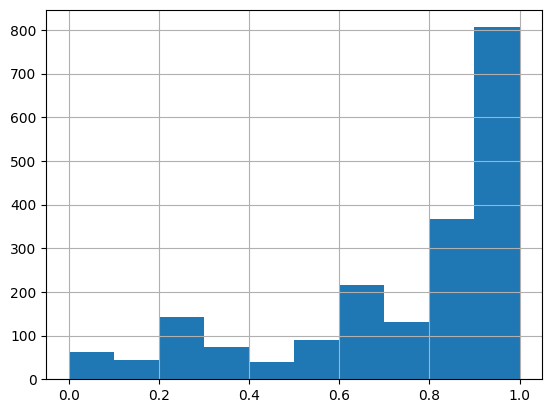

In [35]:
absolute_difference_2.hist()
plt.show()

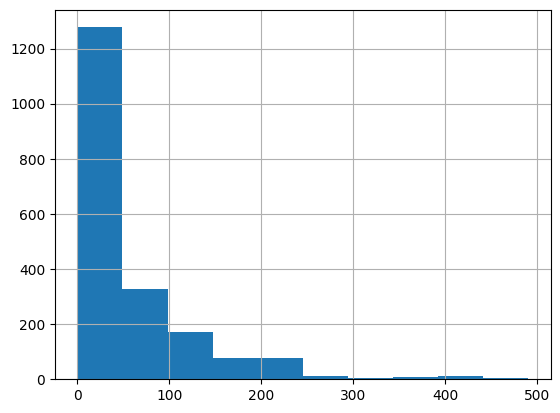

In [36]:
min_val.hist()
plt.show()

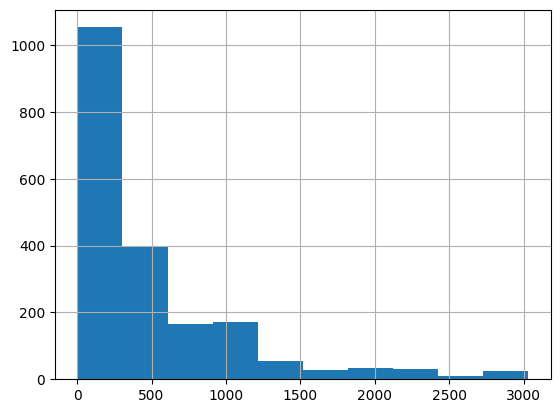

In [37]:
max_val.hist()
plt.show()

##### Para valores atípicos para productos que han sido comprados de 3 - 5 veces

Por tener pocos datos aún no podemos aplicar método de IQR.

Debido a esto, aplicamos nuestra medida de distancia relacionada a la mediana. `absolute_difference_2_5` responde a ¿Cuál es el % absoluto de diferencia entre el valor analizada y la mediana del grupo?

Este valor puede ser positivo si `unit_value > unit_value_median` y negativo en el caso contrario. Por eso es necesario aplicar un valor absoluto a la operación.

In [38]:
mask_repeated_3_5 = (df2.orderId_count>2) & (df2.orderId_count<6)
absolute_difference_3_5 = np.abs(df2.unit_value/df2.unit_value_median -1)

condition_repeated_3_5 = (absolute_difference_3_5<=0.4) & mask_repeated_3_5

<Axes: >

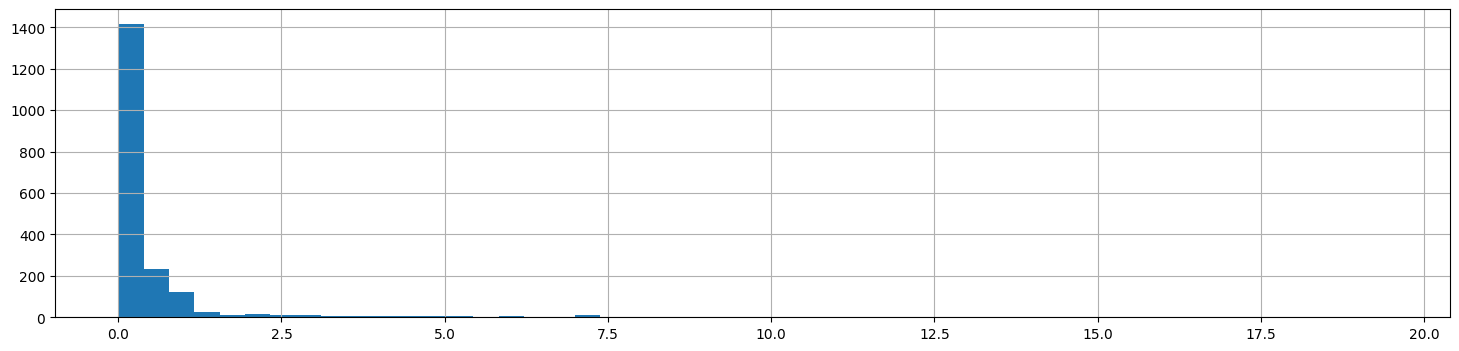

In [39]:
absolute_difference_3_5[absolute_difference_3_5<20].hist(bins=50, figsize=(18, 4))

##### Para valores atípicos para productos que han sido comprados de 6 o más veces

In [40]:
# Funciones para calcular el Rango Intercuatil

th = 1.5
def lower_bound(x):
    x = x.copy(deep=True)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    return Q1 - th * (Q3 - Q1)

def upper_bound(x):
    x = x.copy(deep=True)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    return Q1 + th * (Q3 - Q1)

In [41]:
mask_repeated_6more = df2.orderId_count>5

lower_bound_values = df2.groupby('Product Name')['unit_value'].transform(lower_bound)
upper_bound_values = df2.groupby('Product Name')['unit_value'].transform(upper_bound)

condition_repeated_6more = ((df2.unit_value > lower_bound_values) & (df2.unit_value < upper_bound_values)) & mask_repeated_6more

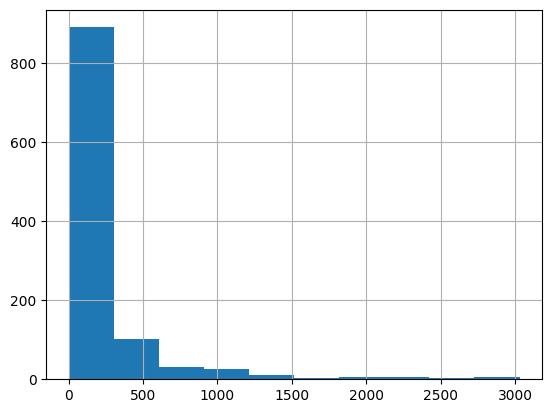

In [42]:
df2[~condition_repeated_6more].unit_value.hist()
plt.show()

#### Eliminamos los outliers

In [43]:
df2 = df2[(df2.orderId_count==1) | condition_repeated_2 | condition_repeated_3_5 | condition_repeated_6more].copy(deep=True)
df2.drop(['orderId_count', 'unit_value_median'], axis=1, inplace=True)

print(f'Antes de eliminar outliers: {df.shape}')
print(f'Luego de eliminar outliers: {df2.shape}')
print(f'Total de registros eliminados: {df.shape[0]-df2.shape[0]}\n\n')
df2.info()

Antes de eliminar outliers: (2121, 21)
Luego de eliminar outliers: (1463, 16)
Total de registros eliminados: 658


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 4 to 9990
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1463 non-null   object        
 1   Customer ID   1463 non-null   object        
 2   Order Date    1463 non-null   datetime64[ns]
 3   Ship Date     1463 non-null   datetime64[ns]
 4   Coordinates   1463 non-null   object        
 5   State         1463 non-null   object        
 6   City          1463 non-null   object        
 7   Segment       1463 non-null   object        
 8   Ship Mode     1463 non-null   object        
 9   Sub-Category  1463 non-null   object        
 10  Product Name  1463 non-null   object        
 11  Discount      1463 non-null   float64       
 12  Sales         1463 non-null   float64       
 13  Quantity      1463 non-

# Feature Engeniering

## Feature Creation

Recordemos que anteriormente, en la sección de **Prunning** ya creamos `'unit_value'`

Este valor representa el valor unitario de precio a la venta del producto.

### Date features

In [44]:
#@title <code>'Season'</code> en la que la orden se efectuó

# adding the season in base of the month
for index, date in df2['Order Date'].items():
  if(date.month>=3 and date.month<6):
    df2.at[index, "Season"]='Spring'
  elif(date.month>=6 and date.month<9):
    df2.at[index, "Season"]='Summer'
  elif(date.month>=9 and date.month<12):
    df2.at[index, "Season"]='Fall'
  else:
   df2.at[index, "Season"]='Winter'

In [45]:
#@title <code>'period'</code> entre la fecha de compra más reciente realizada y la fecha de facturación

maxfecha = df2['Order Date'].max() # esta fecha se corresponde con la transacción (compra) más reciente realizada por cualquier cliente
df2['period'] = maxfecha - df2['Order Date']

In [46]:
#@title <code>'year'</code>, <code>'month'</code>, <code>'day_of_week'</code> en el que la orden se efectuó

df2['year'] = df2['Order Date'].dt.year
df2['month'] = df2['Order Date'].dt.month
df2['day_of_week'] = df2['Order Date'].dt.day_of_week

### Order the features

In [47]:
df2.columns

Index(['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Coordinates',
       'State', 'City', 'Segment', 'Ship Mode', 'Sub-Category', 'Product Name',
       'Discount', 'Sales', 'Quantity', 'Profit', 'unit_value', 'Season',
       'period', 'year', 'month', 'day_of_week'],
      dtype='object')

In [48]:
features = ['Order ID', 'Customer ID', 'Ship Mode', 'Order Date', 'Ship Date',
            'period', 'Season', 'year', 'month', 'day_of_week', 'Coordinates',
            'State', 'City', 'Segment', 'Sub-Category', 'Product Name',
            'Discount', 'Sales', 'Quantity', 'unit_value', 'Profit']
df2 = df2[features]
print(df2.shape)
df2.head(3)

(1463, 21)


,Order ID,Customer ID,Ship Mode,Order Date,Ship Date,period,Season,year,month,day_of_week,...,State,City,Segment,Sub-Category,Product Name,Discount,Sales,Quantity,unit_value,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,
4,US-2015-108966,SO-20335,Standard Class,2015-10-11,2015-10-18,811 days,Fall,2015,10,6,...,Florida,Fort Lauderdale,Consumer,Tables,Bretford CR4500 Series Slim Rectangular Table,0.45,957.5775,5,191.5155,-383.0310
11,CA-2014-115812,BH-11710,Standard Class,2014-06-09,2014-06-14,1300 days,Summer,2014,6,0,...,California,Los Angeles,Consumer,Tables,Chromcraft Rectangular Conference Tables,0.20,1706.1840,9,189.5760,85.3092
25,CA-2015-106320,EB-13870,Standard Class,2015-09-25,2015-09-30,827 days,Fall,2015,9,4,...,Utah,Orem,Consumer,Tables,Bretford CR4500 Series Slim Rectangular Table,0.00,1044.6300,3,348.2100,240.2649


## Feature Scaling

# Save Data

In [59]:
file_name = 'data_cleaned.csv'
path_to_save = os.path.join(project_path, file_name)

df2.to_csv(path_to_save)